Used Car Price Prediction --Random Forest Regressor

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#importing the dataset
df = pd.read_csv('/content/cardekho_data.csv')

#EDA

In [ ]:
df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
print("Fuel_Type:",df.Fuel_Type.unique())

Fuel_Type: ['Petrol' 'Diesel' 'CNG']


In [ ]:
print("Seller_Type:",df.Seller_Type.unique())

Seller_Type: ['Dealer' 'Individual']


In [ ]:
print("Transmission:",df.Transmission.unique())

Transmission: ['Manual' 'Automatic']


In [ ]:
print("Owner:",df.Owner.unique())

Owner: [0 1 3]


In [ ]:
print(df.describe())

              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [ ]:
df['Current_year'] =2024
df['No_of_years'] = df['Current_year']-df['Year']

In [ ]:
#Drop the columns carName,year,Current_year
df.drop(['Car_Name','Year','Current_year'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'No_of_years'],
      dtype='object')

In [ ]:
#Convert data from Categorical form to Numerical form
from sklearn.preprocessing import LabelEncoder
df['Fuel_Type'] = LabelEncoder().fit_transform(df['Fuel_Type'])
df['Seller_Type'] = LabelEncoder().fit_transform(df['Seller_Type'])
df['Transmission'] = LabelEncoder().fit_transform(df['Transmission'])
df['Owner'] = LabelEncoder().fit_transform(df['Owner'])

In [ ]:
df.head()

Selling_Price  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
0           3.35           5.59       27000          2            0   
1           4.75           9.54       43000          1            0   
2           7.25           9.85        6900          2            0   
3           2.85           4.15        5200          2            0   
4           4.60           6.87       42450          1            0   

   Transmission  Owner  No_of_years  
0             1      0           10  
1             1      0           11  
2             1      0            7  
3             1      0           13  
4             1      0           10

In [ ]:
df['Seller_Type']

0      0
1      0
2      0
3      0
4      0
      ..
296    0
297    0
298    0
299    0
300    0
Name: Seller_Type, Length: 301, dtype: int64

In [ ]:
df['Owner']

0      0
1      0
2      0
3      0
4      0
      ..
296    0
297    0
298    0
299    0
300    0
Name: Owner, Length: 301, dtype: int64

In [ ]:
df['Transmission']

0      1
1      1
2      1
3      1
4      1
      ..
296    1
297    1
298    1
299    1
300    1
Name: Transmission, Length: 301, dtype: int64

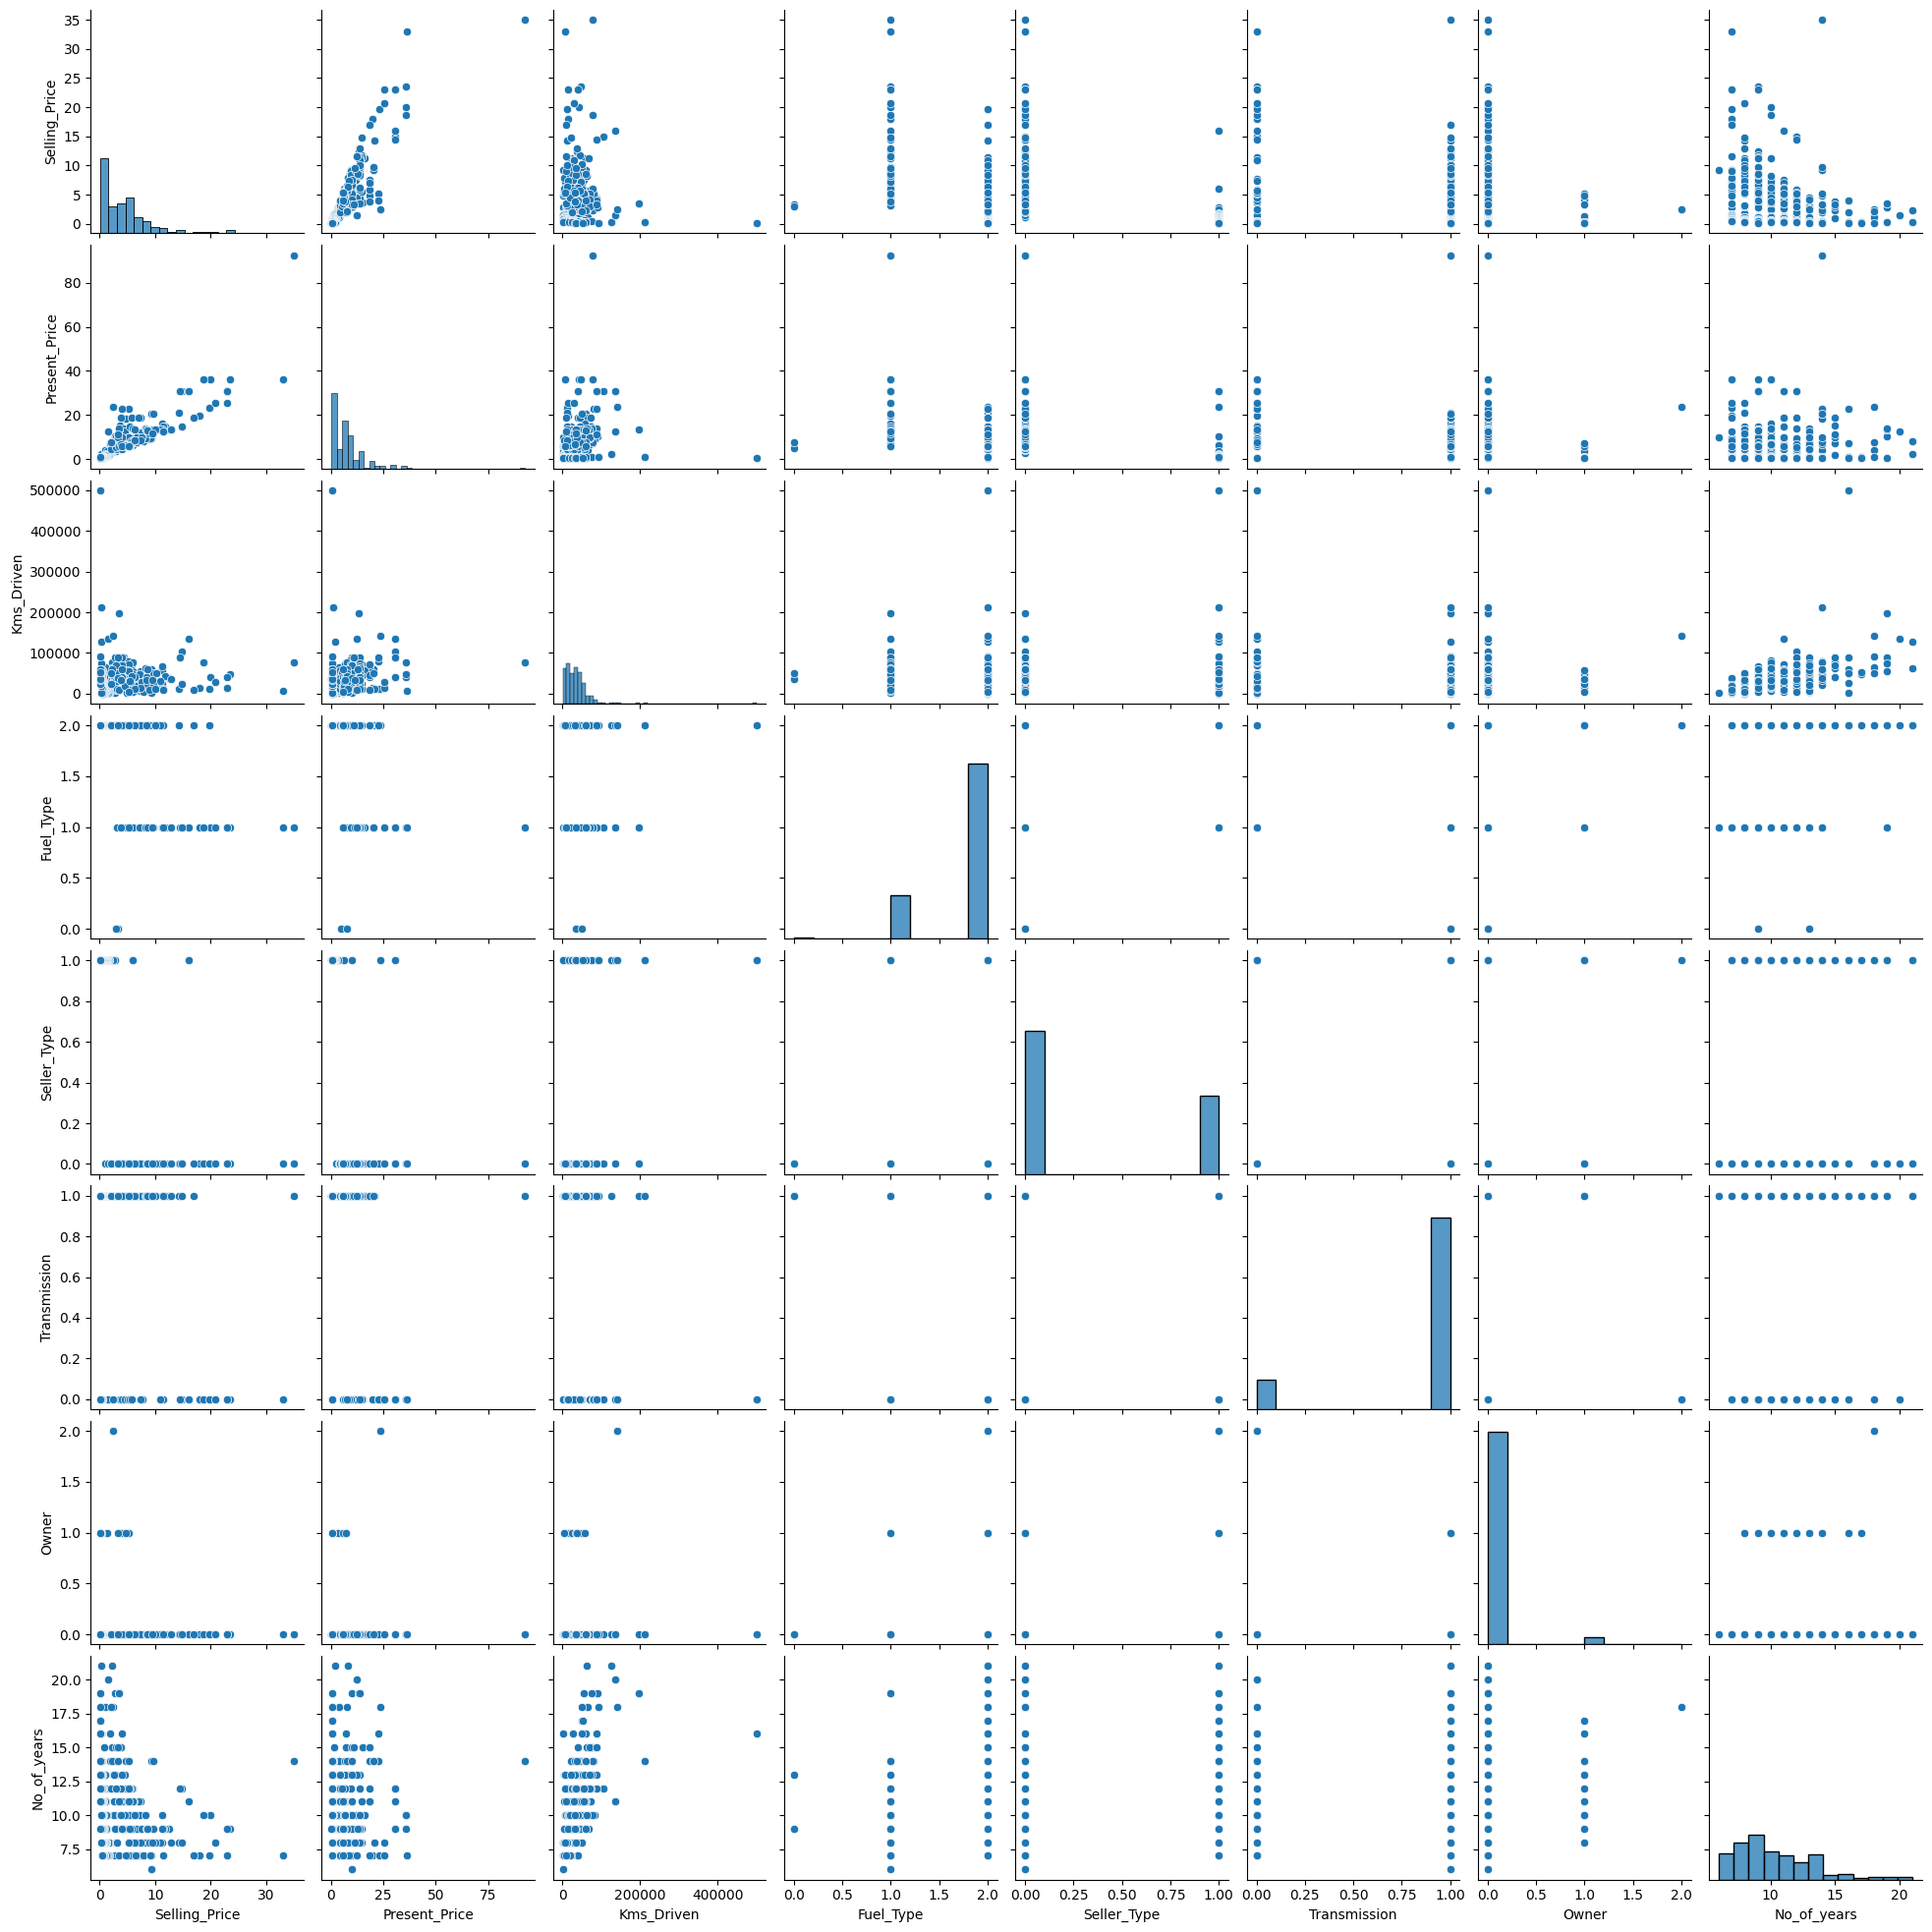

In [ ]:
print(sns.pairplot(df))
plt.show()

Axes(0.125,0.11;0.62x0.77)


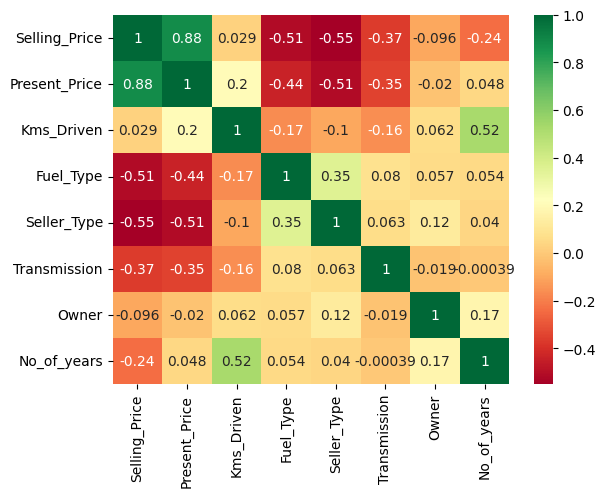

In [ ]:
print(sns.heatmap(df.corr(),annot=True,cmap='RdYlGn'))
plt.show()

#Splitting the data

In [ ]:
#Splitting the data
X = df.drop('Selling_Price',axis=1)
y = df.Selling_Price

#Feature Selection(Feature Importance)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
feat_imp = model.fit(X,y)

In [ ]:
feat_imp.feature_importances_

array([3.89586312e-01, 4.19983037e-02, 1.50001711e-01, 2.58988610e-01,
       8.45527174e-02, 1.94274707e-04, 7.46780710e-02])

<Axes: >

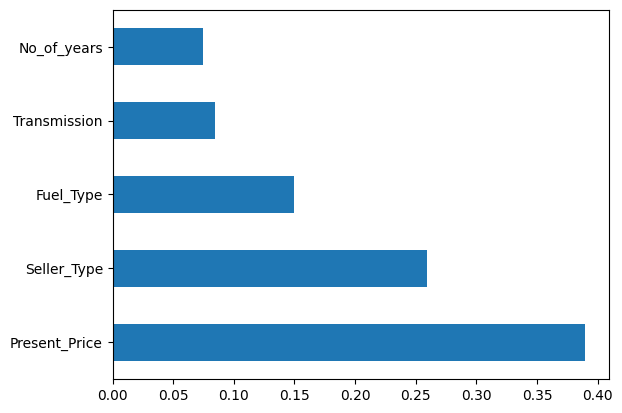

In [ ]:
imp = pd.Series(feat_imp.feature_importances_,index = X.columns)
imp.nlargest(5).plot(kind = 'barh')

#Splitting the data



In [ ]:
#Splitting the data
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.2,random_state=0)


#Model selection

In [ ]:
#Model selection
regressor =  RandomForestRegressor()

#Hyper parameter Tunning

In [ ]:
n_estimators = [int(i) for i in np.linspace(start=100,stop=1200,num=12)]
max_features =['auto','sqrt']
max_depth = [int(i) for i in np.linspace(start=5,stop=30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf
               }

In [ ]:
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_regressor = RandomizedSearchCV(estimator=regressor,param_distributions=random_grid,scoring='neg_mean_squared_error',cv=5,verbose=2,random_state=42,n_jobs=1)

#Training the model

In [ ]:
rf_regressor.fit(X_train,y_train)
print(rf_regressor.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_features=sqrt, mi

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END max_features=sqrt, min_samples

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.9s
[CV] END max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1100; total time=   1.3s
[CV] END max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1100; total time=   1.3s
[CV] END max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1100; total time=   1.3s
[CV] END max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1100; total time=   1.6s
[CV] END max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1100; total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto'}


In [ ]:
y_pred = rf_regressor.predict(X_test)

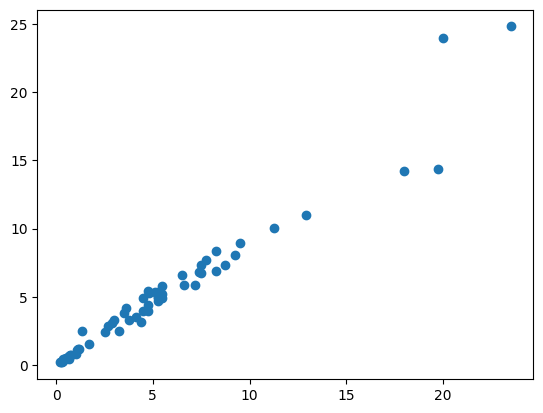

In [ ]:
plt.scatter(y_test,y_pred)
plt.show()

In [ ]:
finaldf = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(finaldf)

     Actual  Predicted
223    8.25   6.866432
150    0.50   0.519657
226    5.25   4.710666
296    9.50   8.963952
52    18.00  14.189084
..      ...        ...
137    0.65   0.430639
227    2.55   2.457771
26     4.15   3.509172
106    1.35   2.528055
92     3.51   3.798974

[61 rows x 2 columns]


<Axes: >

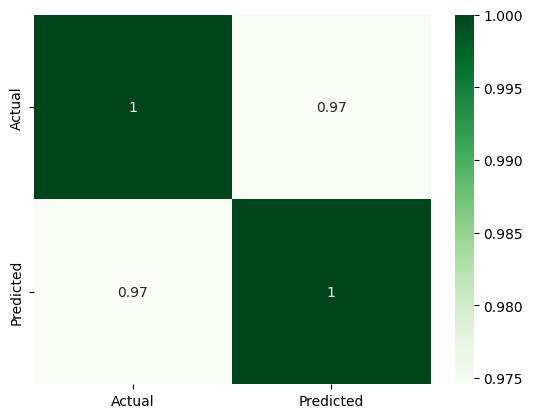

In [ ]:
sns.heatmap(finaldf.corr(),annot=True,cmap= 'Greens')

#Performance/Accuracy of the model

In [ ]:
r2_score(y_test,y_pred)

0.9464117345961659

Conclusion : The Accuracy Score of the Model is increased from 35% (Using Decision Tree Regressor) to 94% (Using Random Forest Regressor).